1. Histogram Processing

In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

i. Image Histogram

In [2]:
img = cv2.imread(r'images\Aerial.tif', cv2.IMREAD_GRAYSCALE)

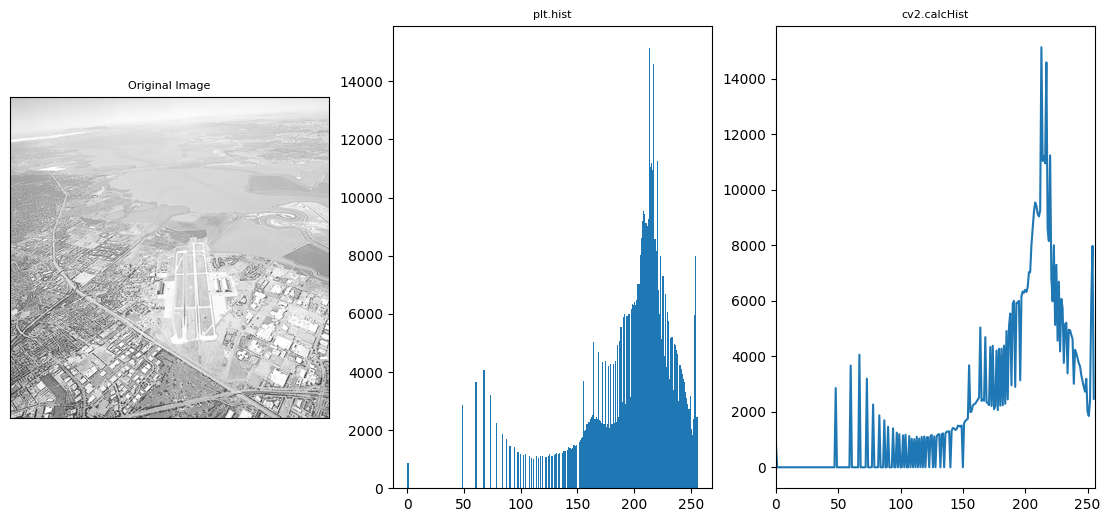

In [3]:
plt.figure(figsize=(14,6), num='test.img')

# original image
plt.subplot(131)
plt.title('Original Image', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

# using plt.hist
plt.subplot(132)
plt.title('plt.hist', fontsize = 8)
plt.hist(img.ravel(), 256, [0, 256])

# using cv2.calcHist
plt.subplot(133)
#cv2.calchist(imags, channels, mask, bin count, ranges)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.title('cv2.calcHist', fontsize = 8)
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

ii. Histogram Equalization - Grayscale

In [4]:
FONT_SIZE = 10
COLOR = 'maroon'

img = cv2.imread(r'images\Aerial.tif', 0)
histEQ = cv2.equalizeHist(img)

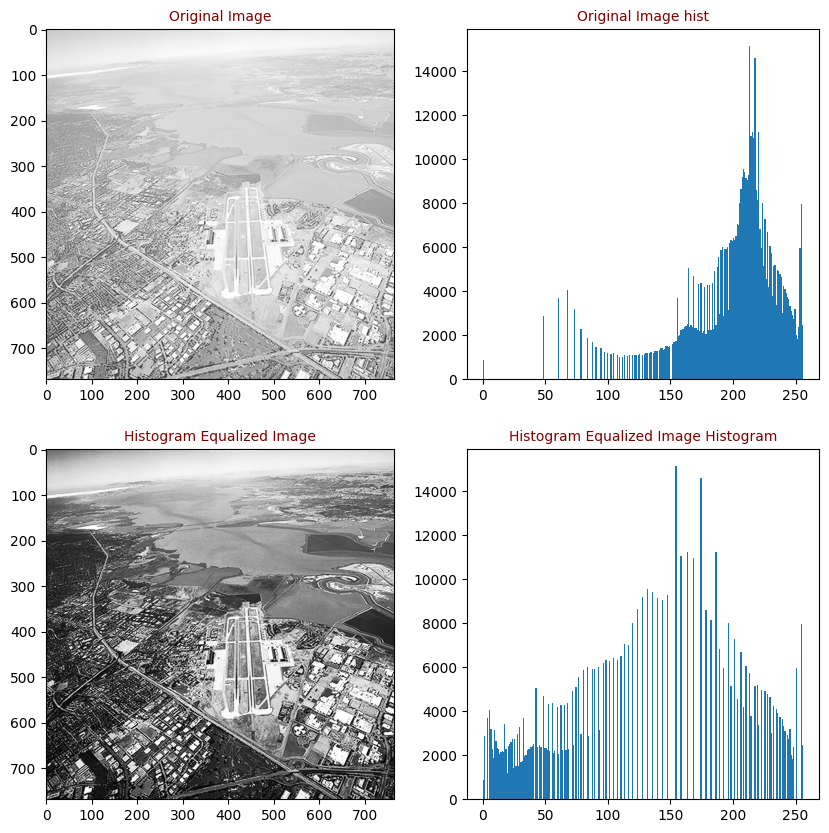

In [5]:
plt.figure(figsize=(10,10), num='test.img')

# original image
plt.subplot(221)
plt.title('Original Image', c = COLOR, fontsize = FONT_SIZE)
plt.imshow(img, 'gray')

# 
plt.subplot(222)
plt.title('Original Image hist', c = COLOR, fontsize = FONT_SIZE)
plt.hist(img.ravel(), 256, [0, 256])

# 
plt.subplot(223)
plt.title('Histogram Equalized Image', c = COLOR, fontsize = FONT_SIZE)
plt.imshow(histEQ, 'gray')

# 
plt.subplot(224)
plt.title('Histogram Equalized Image Histogram', c = COLOR, fontsize = FONT_SIZE)
plt.hist(histEQ.ravel(), 256, [0, 256])

plt.show()

iii. Histogram Equalization - Color Image

In [6]:
img = cv2.imread(r'images\1.jpg', 1)

In [7]:
# BGR --(BGR2HSV)-> HSV --(HE : cv2.s..., cv2.equaliza..() )-> EQ-V

def equalizeHistColorHSV(img):
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eqV = cv2.equalizeHist(V)
    eqImg = cv2.cvtColor(cv2.merge([H, S, eqV]), cv2.COLOR_HSV2BGR)
    
    return eqImg

def histogramForColorImg(img):
    hists = []

    for i in range(img.shape[2]):
        hist = cv2.calcHist([img], [i], None, [256], [0,256])
        hists.append(hist)

    return hists

histEQ = equalizeHistColorHSV(img)
#hists_ = histogramForColorImg(img)
histsEQ = histogramForColorImg(histEQ)

(array([89296.,   715., 39999.,  3491., 15241., 32779.,  2511., 17726.,
        28435.,  2739., 17715., 27594.,  2968., 16723., 25117.,  3504.,
        14579., 24170.,  3720., 14892., 21683.,  4356., 15390., 19643.,
         5657.,  7736., 24594.,  6332.,  9194., 21493.,  6660.,  8525.,
        19295.,  6849.,  8180., 19607.,  6430.,  8079., 17173.,  6644.,
         8427., 16492.,  6118.,  8398., 15422.,  6369.,  7686., 14780.,
         6702.,  6815., 14624.,  6129.,  7632., 14202.,  5958.,  7274.,
        12819.,  6318.,  6941., 12165.,  6416.,  6017., 12700.,  5283.,
         5547., 12108.,  5795.,  5060., 11705.,  4569.,  4942., 11297.,
         4604.,  4722., 10988.,  4026., 10744.,  3797.,  4186., 10259.,
         3771.,  3735.,  9521.,  3714.,  9542.,  3319.,  3530.,  9631.,
         3434.,  3442.,  9535.,  3171.,  9052.,  3198.,  3155.,  8408.,
         2981.,  8151.,  3083.,  2573.,  8108.,  2750.,  7709.,  2757.,
         7956.,  2373.,  7540.,  2592.,  2336.,  7313.,  2218., 

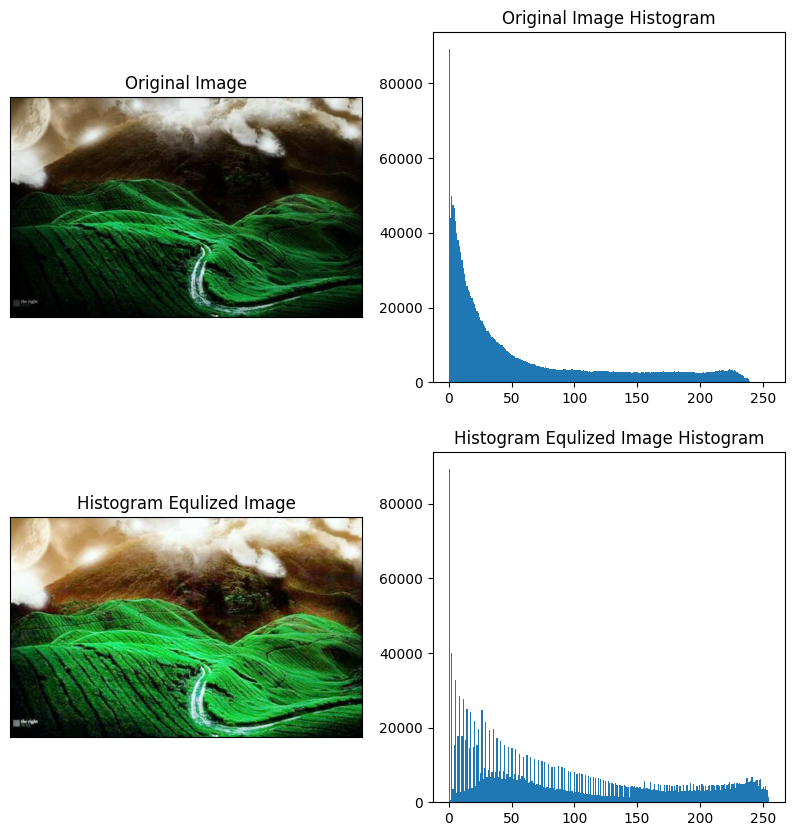

In [8]:
plt.figure(figsize=(10,10), num='test.img')

plt.subplot(221)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

plt.subplot(222)
plt.title('Original Image Histogram')
plt.hist(img.ravel(), 256)

plt.subplot(223)
plt.title('Histogram Equlized Image')
plt.xticks([]), plt.yticks([])
plt.imshow(histEQ, 'gray')

plt.subplot(224)
plt.title('Histogram Equlized Image Histogram')
plt.hist(histEQ.ravel(), 256)


iii. Contrast Limited Adaptive Histogram Equalization

a. For GrayScale Image

In [9]:
img = cv2.imread(r'images\clahe_1.jpg', 0)

# global
histEqImg = cv2.equalizeHist(img)

# creating a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
grayImgCLAHE = clahe.apply(img)

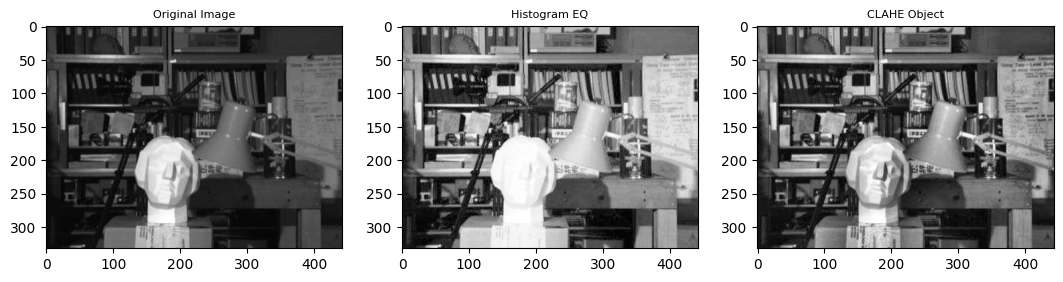

In [10]:
plt.figure(figsize=(13,13), num='test.img')

# original image
plt.subplot(131)
plt.title('Original Image', fontsize = 8)
plt.imshow(img, 'gray')

# 
plt.subplot(132)
plt.title('Histogram EQ', fontsize = 8)
plt.imshow(histEqImg, 'gray')

# 
plt.subplot(133)
plt.title('CLAHE Object', fontsize = 8)
# plt.plot(hist)
plt.imshow(grayImgCLAHE, 'gray')

plt.show()

b. For Color Image

###### Create a function to apply CLAHE on color images and visualize outputs for clip limits 2.0, 5.0, 10.0 and 20.0. Use the image “1.jpg”

In [11]:
img = cv2.imread(r'images\1.jpg', 1)

def equalizeClaheColorHSV(img, clipLimit):
    cla = cv2.createCLAHE(clipLimit)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eqV = cv2.equalizeHist(V)
    eqImg = cv2.cvtColor(cv2.merge([H, S, eqV]), cv2.COLOR_HSV2BGR)
    
    return eqImg

clEqImg = equalizeHistColorHSV(img, 4.0)

plt.subplot(121)
plt.imshow(cv2.cvtColor())

plt.subplot(122)
plt.imshow(cv2.cvtColor())

TypeError: equalizeHistColorHSV() takes 1 positional argument but 2 were given

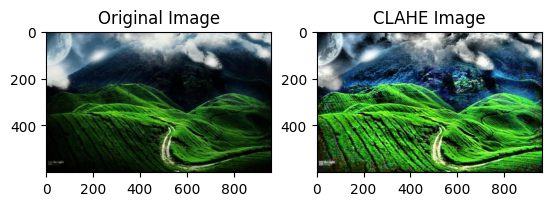

In [16]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'images\1.jpg', 1)

def equalizeClaheColorHSV(img, clipLimit):
    cla = cv2.createCLAHE(clipLimit)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eqV = cla.apply(V)
    eqImg = cv2.cvtColor(cv2.merge([H, S, eqV]), cv2.COLOR_HSV2BGR)
    
    return eqImg

# Use the correct function name
clEqImg = equalizeClaheColorHSV(img, 10.0)
clEqImg = cv2.cvtColor(clEqImg, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(clEqImg)
plt.title('CLAHE Image')

plt.show()


2. Power Law Transformation

Gamma Correction

In [ ]:
img = cv2.imread(r'images\graylevel6.jpg', 0)

In [ ]:
def gammaTransform(img, gamma):
    if(len(img.shape) == 3):
        for j in range(img.shape[2]):
            img[:,:,j] = 255 * (img[:,:,j]/255) ** gamma
    else:
        img = 255 * ((img/255) ** gamma)

    return img

gam1 = gammaTransform(img, 0.1)
gam2 = gammaTransform(img, 2.5)

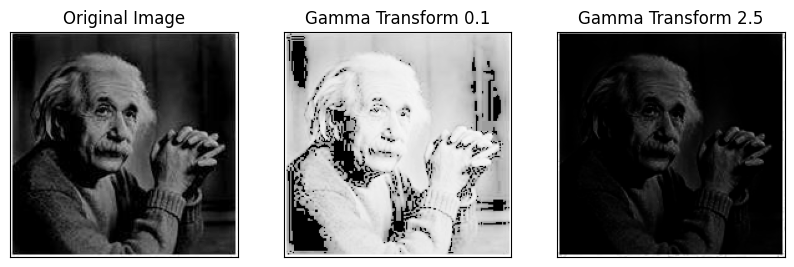

In [ ]:
plt.figure(figsize=(10,10), num='test.img')

plt.subplot(131)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

plt.subplot(132)
plt.title('Gamma Transform 0.1')
plt.xticks([]), plt.yticks([])
plt.imshow(gam1, 'gray')

plt.subplot(133)
plt.title('Gamma Transform 2.5')
plt.xticks([]), plt.yticks([])
plt.imshow(gam2, 'gray')